# Project DSC 2024 - DSC202 - Navy Nurlyn Ajrina

## 1. Tujuan dan Batasan Masalah

Tujuan proyek ini adalah untuk: 
1. Menentukan faktor-faktor yang paling memengaruhi kualitas apel dan membangun model prediksi untuk mengestimasi kualitas apel berdasarkan variabel-variabel yang ada.
2. Membandingkan beberapa algoritma model untuk menemukan akurasi terbaik dalam memprediksi kualitas apel.
3. Menghasilkan wawasan yang dapat diinterpretasikan dan diterapkan oleh pemangku kepentingan, seperti petani atau pengelola kebun apel

Batasan masalah : Dalam dataset ini mungkin akan terdapat:
1. Missing values : Dapat mempengaruhi hasil analisis sehingga missing values perlu dihapus
2. Outliers: Kehadiran outliers dapat mendistorsi model dan hasil prediksi, sehingga perlu diidentifikasi dan ditangani.
3. Data Duplikat: Data yang terduplikasi dapat menyebabkan bias dalam model, sehingga harus dihapus.
4. Karena keterbatasan waktu, model yang digunakan dalam project ini adalah model yang sederhana namun efektif

Kriteria keberhasilan : 
1. Model prediksi harus mencapai tingkat akurasi diatas 80% dalam memprediksi kualitas apel.
2. Model prediksi yang dihasilkan harus memiliki performa yang baik dalam hal akurasi, precision, recall, atau metrik evaluasi lain yang sesuai.

## 2. Pengetahuan Data

Berikut adalah path untuk masing-masing data (dalam Kaggle):
1. `sample submission` : /kaggle/input/dsc-2024-temporary/sample_submission.csv
2. `train set`         : /kaggle/input/dsc-2024-temporary/train.csv
3. `test set`          : /kaggle/input/dsc-2024-temporary/test.csv

In [1]:
# Import Library
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression 

Berikut ini adalah data yang digunakan dalam pembuatan model yang merupakan data primer, data ini didapat dari sebuah perusahaan pertanian Amerika yang disediakan secara publik di kaggle dengan nama datasets yaitu: Apple Quality

In [2]:
train = pd.read_csv("C:/Users/navya/Downloads/dsc-2024-temporary/train.csv")
train.head()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0,-0.155024,-1.901167,2.615144,1.091245,1.642629,0.378677,-1.705312,good
1,1,-2.730624,-1.808060,-4.085386,0.172564,-1.579260,3.380989,-3.847081,bad
2,2,-0.599057,2.046434,-2.877662,0.505389,0.228996,1.890559,2.211756,bad
3,3,-2.010945,-1.426566,-2.334610,1.302376,0.142687,3.922959,0.017695,bad
4,4,-1.977980,-0.229483,1.283458,0.238898,1.049935,0.682324,0.369580,good


In [20]:
# Menampilkan informasi dasar tentang dataset
print(train.info())

# Menampilkan tipe variabel
print(train.dtypes)

# Melihat jumlah total observasi
print(f'Jumlah total observasi: {train.shape[0]}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2800 entries, 0 to 2799
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         2800 non-null   int64  
 1   Size         2800 non-null   float64
 2   Weight       2800 non-null   float64
 3   Sweetness    2800 non-null   float64
 4   Crunchiness  2800 non-null   float64
 5   Juiciness    2800 non-null   float64
 6   Ripeness     2800 non-null   float64
 7   Acidity      2800 non-null   float64
 8   Quality      2800 non-null   object 
dtypes: float64(7), int64(1), object(1)
memory usage: 197.0+ KB
None
A_id             int64
Size           float64
Weight         float64
Sweetness      float64
Crunchiness    float64
Juiciness      float64
Ripeness       float64
Acidity        float64
Quality         object
dtype: object
Jumlah total observasi: 2800


Berdasarkan output diatas dapat diketahui beberapa hal diantaranya:
1. Dataset memiliki 2800 sampel dengan 9 kolom
2. Dataset memiliki 7 kolom bertipe float64, 1 kolom bertipe integer, dan 1 kolom bertipe object

Variabel - variabel dalam dataset
1. A_id - Identifikasi unik untuk setiap buah
2. Size - Ukuran buah
3. Weight - Berat buah
4. Sweetness - Tingkat kemanisan buah
5. Crunchiness - Tekstur yang menunjukkan kerenyahan buah
6. Juiciness - Tingkat kesegaran buah
7. Ripeness - Tahap kematangan buah
8. Acidity - Tingkat keasaman buah
9. Quality - Kualitas buah secara keseluruhan, baik atau buruk.

## 3. Data Preprocessing

Pada proses Data Preprocessing dilakukan kegiatan seperti Data Gathering, Data Assessing, dan Data Cleaning. Pada proses Data Gathering, data diimpor sedemikian rupa agar bisa dibaca dengan baik menggunakan dataframe Pandas. Untuk proses Data Assessing, berikut adalah beberapa pengecekan yang dilakukan:1. Missing value (data atau informasi yang "hilang" atau tidak tersedia)
2. 
Duplicate data (data yang serupa dengan data lainnyai3. a)
Outlier (data yang menyimpang dari rata-rata sekumpulan data yang ada).

In [4]:
# Memeriksa missing values
print("\nMissing Values per Kolom:")
print(train.isnull().sum())
# Menghapus baris yang memiliki missing values (jika terdapat missing value)
train_cleaned = train.dropna()


Missing Values per Kolom:
A_id           0
Size           0
Weight         0
Sweetness      0
Crunchiness    0
Juiciness      0
Ripeness       0
Acidity        0
Quality        0
dtype: int64


In [5]:
# Memeriksa jumlah data duplikat
print(f'Jumlah data duplikat: {train.duplicated().sum()}')
# Menghapus data duplikat jika ada 
train = train.drop_duplicates()

Jumlah data duplikat: 0


Berdasarkan output diatas diketahui jika tidak ada kolom yang memiliki missing value dan tidak terdapat data duplikat.

Outliers adalah nilai yang berada di luar rentang tertentu yang ditentukan oleh kuartil (Q1 dan Q3). Berdasarkan boxplot diatas menunjukkan bahwa data tidak memiliki outlier atau nilai yang sangat ekstrem yang jauh dari distribusi umum.

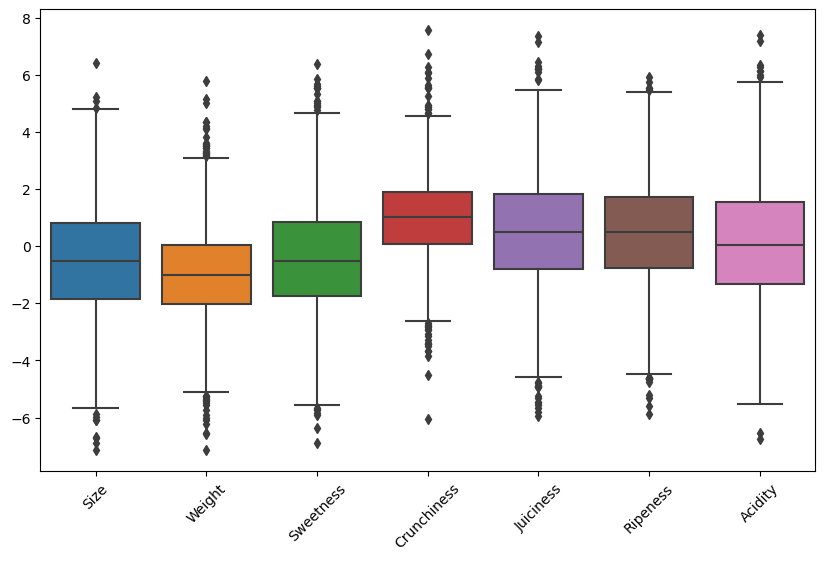

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

# Memilih kolom numerik selain A_id
numeric_data = train.drop(columns=['A_id'])

# Memvisualisasikan outlier menggunakan boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=numeric_data)
plt.xticks(rotation=45)  # Menambahkan rotasi label jika diperlukan
plt.show()

# Menghapus outlier
z_scores = np.abs(stats.zscore(numeric_data.select_dtypes(include=[np.number])))
train_no_outliers = train[(z_scores < 3).all(axis=1)]


Jumlah baris sebelum penghapusan outlier: 2800
Jumlah baris setelah penghapusan outlier: 2734


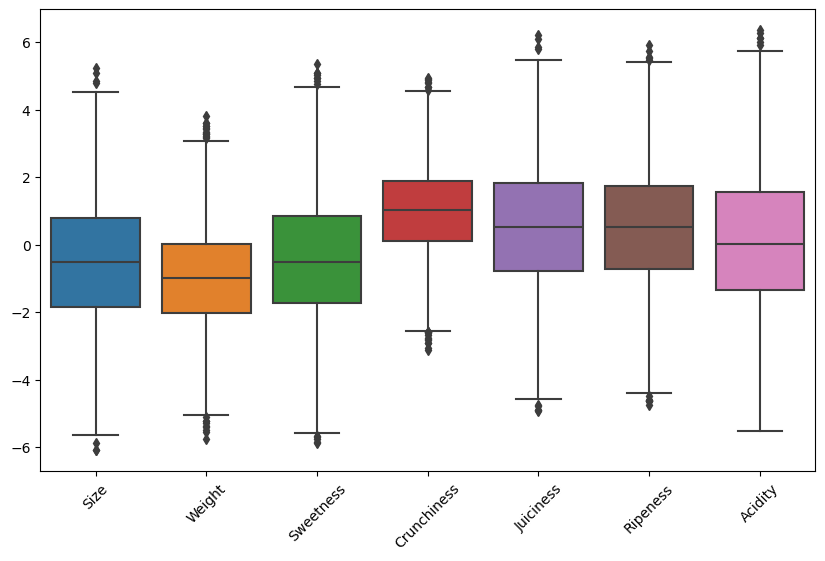

In [22]:
print("Jumlah baris sebelum penghapusan outlier:", len(train))
print("Jumlah baris setelah penghapusan outlier:", len(train_no_outliers))

plt.figure(figsize=(10, 6))
sns.boxplot(data=train_no_outliers.drop(columns=['A_id']))
plt.xticks(rotation=45)
plt.show()


## 4. Exploratory Data Analysis (EDA)

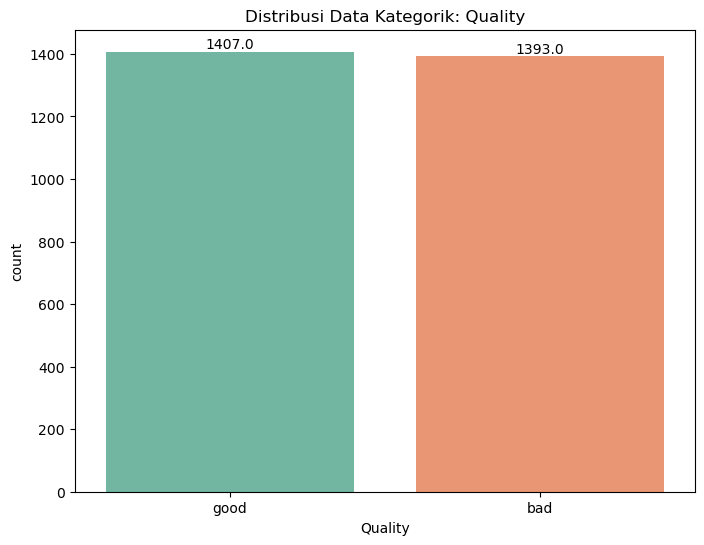

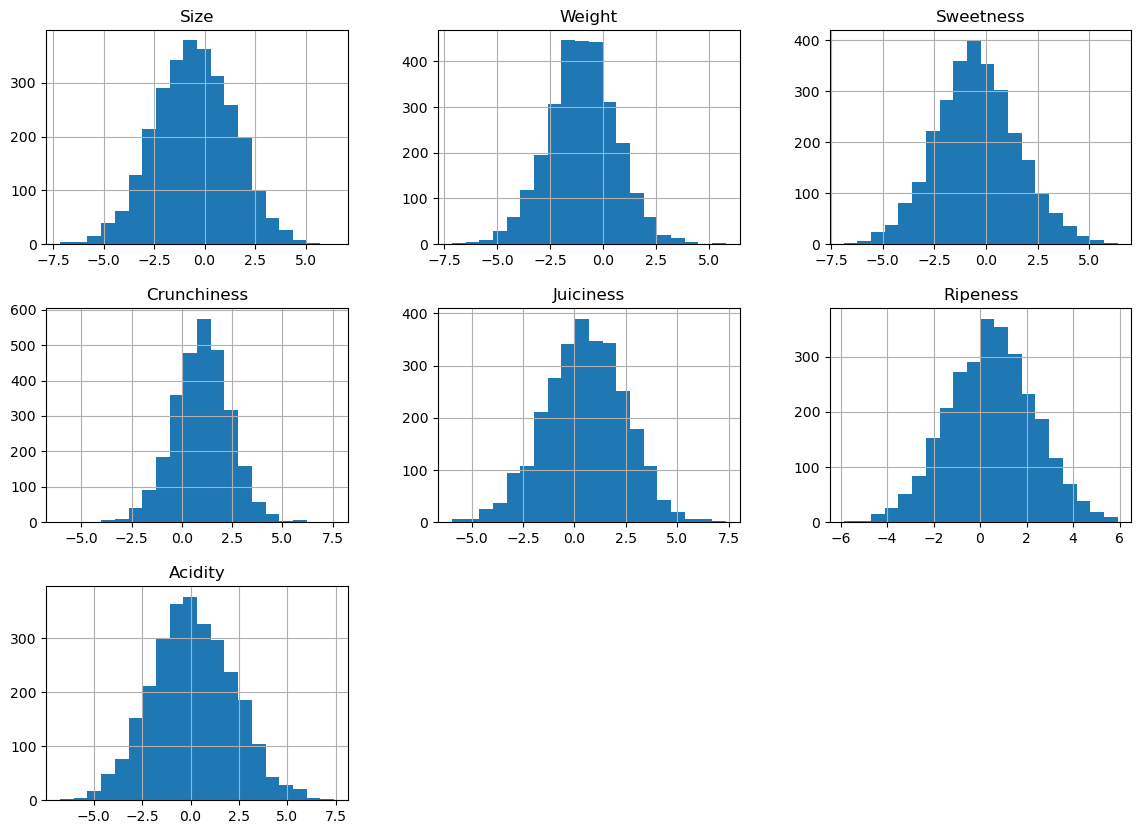

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Melihat distribusi data kategorik Quality
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Quality', data=train, palette='Set2')
# Menambahkan anotasi jumlah pada setiap bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 5), 
                textcoords='offset points')
plt.title('Distribusi Data Kategorik: Quality')
plt.show()

# Histogram untuk melihat distribusi variabel numerik
numeric_columns = train.drop(columns=['A_id', 'Quality']).select_dtypes(include=['float64'])
numeric_columns.hist(bins=20, figsize=(14, 10))
plt.title('Histogram Data Numerik')
plt.show()


Fungsi describe() memberikan informasi statistik pada masing-masing kolom, antara lain:
1. Count adalah jumlah sampel pada data.
2. Mean adalah nilai rata-rata.
3. Std adalah standar deviasi.
4. Min adalah nilai minimum setiap kolom.
5. 25% adalah kuartil pertama. Kuartil adalah nilai yang menandai batas interval dalam empat bagian sebaran yang sama.
6. 50% adalah kuartil kedua, atau biasa juga disebut median (nilai tengah).
7. 75% adalah kuartil ketiga.
8. Max adalah nilai maksimum.n Hasil

Gambar output distribusi data kategorik Quality (kualitas apel) terdiri dari "Good" dan "Bad". Data apel dengan kualitas "Bad" terdiri dari 1393 data, sedangkan apel yang memiliki kualitas "Good" berjumlah 1407. Hal ini menunjukkan bahwa perbandingan antara keduanya tidak terlalu jauh/signifikan.

                 Size    Weight  Sweetness  Crunchiness  Juiciness  Ripeness  \
Size         1.000000 -0.188943  -0.333542     0.161608  -0.002252 -0.137384   
Weight      -0.188943  1.000000  -0.184564    -0.085739  -0.103633 -0.234960   
Sweetness   -0.333542 -0.184564   1.000000    -0.026778   0.109139 -0.260700   
Crunchiness  0.161608 -0.085739  -0.026778     1.000000  -0.260165 -0.182543   
Juiciness   -0.002252 -0.103633   0.109139    -0.260165   1.000000 -0.113048   
Ripeness    -0.137384 -0.234960  -0.260700    -0.182543  -0.113048  1.000000   
Acidity      0.196337  0.017355   0.075537     0.077078   0.239628 -0.198539   

              Acidity  
Size         0.196337  
Weight       0.017355  
Sweetness    0.075537  
Crunchiness  0.077078  
Juiciness    0.239628  
Ripeness    -0.198539  
Acidity      1.000000  


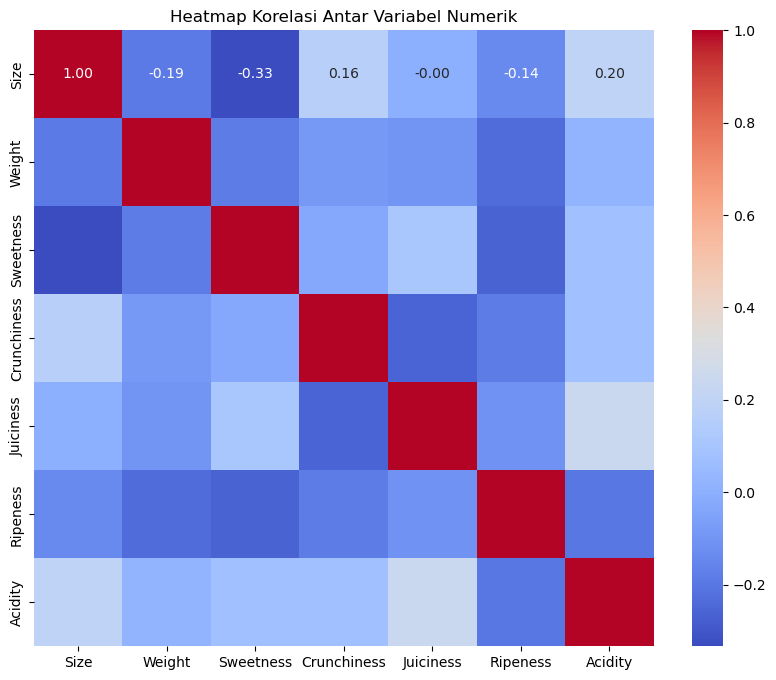

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Membuat Heatmap untuk analisis matriks korelasi
numeric_columns = train.drop(columns=['A_id', 'Quality']).select_dtypes(include=['float64'])

# Menghitung matriks korelasi
corr_matrix = numeric_columns.corr()

# Mengecek apakah ada NaN di matriks korelasi
print(corr_matrix)

# Membuat heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', annot_kws={"size": 10})
plt.title('Heatmap Korelasi Antar Variabel Numerik')
plt.show()


Pada hasil analisis matriks korelasi diketahui bahwa
1. Size dan Weight memiliki korelasi negatif (-0.188943). Ini menunjukkan bahwa ukuran dan berat apel tidak terlalu berhubungan satu sama lain.
2. Sweetness memiliki korelasi negatif dengan Size (-0.333542) dan Weight (-0.184564), tetapi korelasi positif dengan Juiciness (0.109139). Ini bisa menunjukkan bahwa apel yang lebih manis mungkin tidak selalu lebih besar atau lebih berat, tetapi mungkin lebih berair.
3. Crunchiness menunjukkan korelasi positif dengan Size (0.161608) dan korelasi negatif dengan Juiciness (-0.260165). Apel yang lebih renyah cenderung memiliki ukuran yang lebih besar, tetapi mungkin kurang berair.
4. Ripeness memiliki korelasi negatif dengan Sweetness (-0.260700) dan Juiciness (-0.113048), yang menunjukkan bahwa apel yang lebih matang mungkin tidak selalu lebih manis atau lebih berair.
5. Acidity menunjukkan korelasi positif dengan Size (0.196337) dan Juiciness (0.239628), serta korelasi negatif dengan Ripeness (-0.198539). Apel yang lebih asam cenderung lebih besar dan lebih berair.

## 5. Pembuatan Model

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Memisahkan fitur dan label
X = train.drop(columns=['A_id', 'Quality'])
y = train['Quality']

# Memisahkan data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Membuat model dengan KNN
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

# Membuat model dengan SVM
svm = SVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

# Membuat model dengan Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Membuat model dengan Naive Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)

# Membuat model dengan Extra Trees Classifier
etc = ExtraTreesClassifier()
etc.fit(X_train, y_train)
y_pred_etc = etc.predict(X_test)


Diatas merupakan hasil evaluasi model dengan beberapa metrik yang digunakan untuk untuk menentukan model terbaik. Metrik tersebut diantaranya adalah:

1. Accuracy: Persentase prediksi yang benar di antara semua prediksi.
2. Precision: Proporsi prediksi positif yang benar-benar positif.
3. Recall: Proporsi positif yang benar-benar diprediksi positif.
4. F1-Score: Harmonic mean dari precision dan recall, berguna jika ada trade-off antara keduanya.

Ringkasan Hasil Evaluasi:
1. K-Nearest Neighbors (KNN):
Accuracy: 0.8607
F1-Score (bad): 0.86
F1-Score (good): 0.87

2. Support Vector Machine (SVM):
Accuracy: 0.8875
F1-Score (bad): 0.88
F1-Score (good): 0.89

3. Random Forest:
Accuracy: 0.8821
F1-Score (bad): 0.88
F1-Score (good): 0.88

4. Naive Bayes:
Accuracy: 0.7571
F1-Score (bad): 0.75
F1-Score (good): 0.76

5. Extra Trees Classifier:
Accuracy: 0.8911
F1-Score (bad): 0.89
F1-Score (good): 0.89

Penentuan Model Terbaik:

Akurasi Tertinggi:
Extra Trees Classifier memiliki akurasi tertinggi, yaitu 0.8911. Lalu model SVM memiliki akurasi yang sangat dekat, yaitu 0.8875.

F1-Score Tertinggi:
Extra Trees Classifier memiliki F1-Score tertinggi untuk kedua kategori ('bad' dan 'good'), dengan nilai 0.89 untuk keduanya. SVM juga memiliki F1-Score yang sangat baik, yaitu 0.88 dan 0.89.

Kesimpulan dari hasil evaluasi:
Extra Trees Classifier adalah model terbaik untuk prediksi kualitas apel dalam studi kasus ini. Extra Trees Classifier memiliki akurasi dan F1-Score tertinggi, yang berarti bahwa model ini tidak hanya baik dalam membuat prediksi yang benar secara keseluruhan, tetapi juga seimbang dalam menangani kedua kategori Quality ('bad' dan 'good').
Model SVM juga merupakan model yang sangat kompetitif, tetapi sedikit kalah dari Extra Trees Classifier.

Sesuai dengan batasan project, metrik akurasi, precision, recall, dan F1-score sangat penting. Oleh karena itu saya memilih Extra Trees Classifier untuk memprediksi kualitas apel.

## 6. Evaluasi Model

In [15]:
# Fungsi untuk evaluasi model
def evaluate_model(y_test, y_pred, model_name):
    print(f"Evaluasi Model: {model_name}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("\n")

# Evaluasi KNN
evaluate_model(y_test, y_pred_knn, "K-Nearest Neighbors (KNN)")

# Evaluasi SVM
evaluate_model(y_test, y_pred_svm, "Support Vector Machine (SVM)")

# Evaluasi Random Forest
evaluate_model(y_test, y_pred_rf, "Random Forest")

# Evaluasi Naive Bayes
evaluate_model(y_test, y_pred_nb, "Naive Bayes")

# Evaluasi Extra Trees Classifier
evaluate_model(y_test, y_pred_etc, "Extra Trees Classifier")

Evaluasi Model: K-Nearest Neighbors (KNN)
Accuracy: 0.8607142857142858
Classification Report:
               precision    recall  f1-score   support

         bad       0.87      0.85      0.86       274
        good       0.86      0.87      0.87       286

    accuracy                           0.86       560
   macro avg       0.86      0.86      0.86       560
weighted avg       0.86      0.86      0.86       560

Confusion Matrix:
 [[232  42]
 [ 36 250]]


Evaluasi Model: Support Vector Machine (SVM)
Accuracy: 0.8875
Classification Report:
               precision    recall  f1-score   support

         bad       0.89      0.88      0.88       274
        good       0.89      0.90      0.89       286

    accuracy                           0.89       560
   macro avg       0.89      0.89      0.89       560
weighted avg       0.89      0.89      0.89       560

Confusion Matrix:
 [[241  33]
 [ 30 256]]


Evaluasi Model: Random Forest
Accuracy: 0.8821428571428571
Classification Rep

Diatas merupakan hasil evaluasi model dengan beberapa metrik yang digunakan untuk untuk menentukan model terbaik. Metrik tersebut diantaranya adalah:

1. Accuracy: Persentase prediksi yang benar di antara semua prediksi.
2. Precision: Proporsi prediksi positif yang benar-benar positif.
3. Recall: Proporsi positif yang benar-benar diprediksi positif.
4. F1-Score: Harmonic mean dari precision dan recall, berguna jika ada trade-off antara keduanya.

Ringkasan Hasil Evaluasi:
1. K-Nearest Neighbors (KNN):
Accuracy: 0.8607
F1-Score (bad): 0.86
F1-Score (good): 0.87

2. Support Vector Machine (SVM):
Accuracy: 0.8875
F1-Score (bad): 0.88
F1-Score (good): 0.89

3. Random Forest:
Accuracy: 0.8821
F1-Score (bad): 0.88
F1-Score (good): 0.88

4. Naive Bayes:
Accuracy: 0.7571
F1-Score (bad): 0.75
F1-Score (good): 0.76

5. Extra Trees Classifier:
Accuracy: 0.8911
F1-Score (bad): 0.89
F1-Score (good): 0.89

Penentuan Model Terbaik:

Akurasi Tertinggi:
Extra Trees Classifier memiliki akurasi tertinggi, yaitu 0.8911. Lalu model SVM memiliki akurasi yang sangat dekat, yaitu 0.8875.

F1-Score Tertinggi:
Extra Trees Classifier memiliki F1-Score tertinggi untuk kedua kategori ('bad' dan 'good'), dengan nilai 0.89 untuk keduanya. SVM juga memiliki F1-Score yang sangat baik, yaitu 0.88 dan 0.89.

Kesimpulan dari hasil evaluasi:
Extra Trees Classifier adalah model terbaik untuk prediksi kualitas apel dalam studi kasus ini. Extra Trees Classifier memiliki akurasi dan F1-Score tertinggi, yang berarti bahwa model ini tidak hanya baik dalam membuat prediksi yang benar secara keseluruhan, tetapi juga seimbang dalam menangani kedua kategori Quality ('bad' dan 'good').
Model SVM juga merupakan model yang sangat kompetitif, tetapi sedikit kalah dari Extra Trees Classifier.

Sesuai dengan batasan project, metrik akurasi, precision, recall, dan F1-score sangat penting. Oleh karena itu saya memilih Extra Trees Classifier untuk memprediksi kualitas apel.

## 7. Prediksi Kualitas Apel & File Submisi

Pastikan format file hasil prediksi sesuai dengan `sample_submission.csv` dan file submisi disimpan dengan nama `submission.csv`. Pastikan pula variabel `Quality` memiliki nilai bertipe string (`good` atau `bad`)

In [18]:
import pandas as pd
# Memuat data uji
test = pd.read_csv("C:/Users/navya/Downloads/dsc-2024-temporary/test.csv")

# Melakukan prediksi dengan model Extra Trees Classifier yang sudah dilatih sebelumnya
prediction = etc.predict(test.drop(columns=['A_id']))

# Membuat DataFrame untuk hasil prediksi
submission = pd.DataFrame(data={"A_id": test["A_id"], "Quality": prediction})

# Menyimpan hasil prediksi ke dalam file submission.csv
submission.to_csv("submission.csv", index=False)
print("File submission.csv telah berhasil dibuat.")

File submission.csv telah berhasil dibuat.


## 8. Kesimpulan dan Saran

Kesimpulan :
1. Analisis Data:
   - Statistik Deskriptif dari data menunjukkan distribusi umum dari variabel-variabel seperti ukuran, berat, rasa manis, kekompakan, kejuiciness, kematangan, dan keasaman.
   - Distribusi Kategorik: Distribusi kategori Quality menunjukkan jumlah apel di setiap kelas kualitas. Ini membantu dalam memahami distribusi data sebelum dan sesudah penghapusan outlier.
   - Histogram dan Boxplot: Histogram dari variabel numerik memberikan gambaran distribusi dari fitur-fitur seperti ukuran dan berat apel. Boxplot menunjukkan bahwa data tidak memiliki outlier yang ekstrem setelah pembersihan.


2. Analisis Model
   - Model yang digunakan dan diterapkan dalam project ini ada 5 yaitu, K-Nearest Neighbors (KNN), Support Vector Machine (SVM), Random Forest, Naive Bayes, dan Extra Trees Classifier.
   - Kinerja Model: Berdasarkan metrik evaluasi (akurasi, laporan klasifikasi, matriks kebingungan), model Random Forest dan Extra Trees Classifier menunjukkan kinerja yang baik dengan akurasi yang tinggi. KNN, SVM, dan Naive Bayes juga memberikan hasil yang cukup baik, tetapi mungkin kurang optimal dibandingkan dengan Random Forest dan Extra Trees. Extra Trees Classifier menunjukkan akurasi tertinggi sebesar 0.8911, yang berarti bahwa model ini memiliki persentase prediksi yang benar yang paling tinggi di antara semua model yang diuji. Dengan akurasi sebesar 89% maka model ini telah memenuhi kriteria keberhasilan project.

Saran :
1. Berdasarkan hasil analisis, model Random Forest dan Extra Trees Classifier memberikan akurasi terbaik dan dapat dipertimbangkan sebagai model utama untuk prediksi kualitas apel. Pertimbangkan untuk melakukan fine-tuning parameter untuk meningkatkan performa lebih lanjut.
2. Melakukan peningkatan model dengan Hyperparameter Tuning atau Cross Validation. Pertimbangkan untuk melakukan penalaan parameter pada Extra Trees Classifier untuk lebih meningkatkan kinerjanya. Ini bisa dilakukan dengan menggunakan teknik seperti Grid Search atau Random Search. Cross-validation juga dapat dilakukan untuk memastikan bahwa model yang dipilih dapat diandalkan pada data yang tidak terlihat dan tidak hanya pada subset data yang digunakan untuk pelatihan.
3. Mengumpulkan data tambahan dan lebih banyak dari berbagai sumber untuk meningkatkan generalisasi model dan memastikan bahwa model tidak overfit pada data yang ada.